# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Diana Chong
- Skylar Hom
- Tricia Pham
- Sofia Sanchez
- Emily Tam

# Group Members IDs

- A14627769
- A13022643
- A14107552
- A92130382
- A14873136

# Research Question

Are mobile iOS application prices correlated with user ratings?

## Background and Prior Work

Mobile technology has revolutionized how much of the world functions. It has the fastest growth of any technology in history (West, 2015). The speed of information that can be transferred across the globe has astronomically increased. Furthermore, the use of mobile technology has changed the relationship between businesses and consumers (West, 2015). The market for mobile devices, such as smartphones and tablets, has grown in tandem. A study conducted by the Pew Research Center concluded that around 90% of Americans currently have some form of mobile device (West, 2015). One primary component of mobile devices are the applications that are on the phone. They appear as bubble icons on the device’s display that are loaded by tapping on them. Application use is the primary way that users interact with their phones. A few applications are preloaded onto the phone. However, a significant number of applications must be downloaded from a host. For Apple phones, the Apple Store supplies nearly all of the applications that users can choose to download.

Upon the opening of the Apple Store, an “app economy” bloomed. The app economy is the development, marketing, and consumption of mobile applications (Dyer-Witheford, 2014). A significant portion of the software development field is dedicated towards the creation and maintenance of mobile applications (Dyer-Witheford, 2014). Due to the sheer scale of mobile applications, it is crucial for both companies and consumers to understand current trends in the app market. There is a huge spread of variability within the application market -- the type of application, such as social apps, games, or services; the price of the application; the company behind the development of the application; and the services that the application provides. Also, there are demographic trends for users of certain apps, such as age and gender, and statistical trends for products, like user ratings.  

On the company's end, the pricing of apps is mainly driven by a desired end result. Whether a group is striving for user numbers or aiming to make large profits determines if an application is free or paid. However, these desired goals are balanced by what customers are willing to pay for the product which is influenced by perceived quality and level of necessity. If customer reviews are in favor of the product and listed features align with user needs, people are more likely to see it as worthwhile. Since there are an abundant number of free iOS apps, choosing to not make an application free automatically raises the users’ expectations that what they are paying for will be worth the extra dollars that another product may not be asking for. It is up to a company to ensure their app fulfills expectations which goes on to affect if an individual is willing to pay for something they have not been able to even use yet.

User ratings are quite subjective and they encompass a variety of user profiles that conjunctively measure if the quality of a product is worth its monetary value. Ratings can be generally higher for paid apps as customers believe they are getting more and quality matches up to a price point. However, ratings can also be lower as high expectations can exceed what the app provides. General trends of iOS app ratings in relation to prices are largely influenced by the level of uncertainty users have when searching for a tool (Song, Kim, Jones, Baker, & Chin, 2014). This uncertainty, ranging from knowing exactly what is expected from the company’s products to needing an application as a first resource, influences expectations and demands which is reflected upon user app ratings. 




References (include links):
- 1) Dyer-Witheford, N. (2014). App Worker. In Miller P. & Matviyenko S. (Eds.), The Imaginary App (pp. 127-142). 
MIT Press. Retrieved from http://www.jstor.org/stable/j.ctt9qf91w.16
- 2) Song, J., Kim, J., Jones, D. R., Baker, J., Chin, W. W. (2014). Application discoverability and user satisfaction in mobile application stores: An environmental psychology perspective. Elsevier, 59, 37-51. Doi: https://doi.org/10.1016/j.dss.2013.10.004
- 3)West, D. (2015). MOBILE TECHNOLOGY. In Going Mobile: How Wireless Technology is Reshaping Our Lives 
(pp. 1-15). Brookings Institution Press. Retrieved from http://www.jstor.org/stable/10.7864/j.ctt7zsvqt.4


# Hypothesis


Null Hypothesis: There is no relationship between iOS app prices and user ratings.

Alternative Hypothesis: There is a change in user ratings when iOS app prices change. 

# Dataset(s)

Mobile App Statistics (Apple iOS app store) dataset
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#appleStore_description.csv
(7197 observations, 16 variables)

To analyze statistics about Apple iOS applications, we are utilizing the dataset “Mobile App Statistics (Apple iOS app store)” from Kaggle. The dataset provides data regarding variables such as ratings, prices and genres of 7197 different apps. For such variables, user rating is measured on a 0-5-point scale, prices are in US dollars, and some genres include Games, Health & Fitness and Utilities. 


(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read in app data
df = pd.read_csv('AppleStore.csv')

In [3]:
#Check what data looks like
df.head()

#df_desc.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# Data Cleaning

First we need to clean the data so that it better addresses the question we have. We are looking at the relationship between ratings and app price, so we can delete the other columns that are not related to these topics. We then change the names of the columns to be more reader-friendly. Genre/Category is kept in the data set because it may be useful for later analysis. 

In [4]:
#Check columns
df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [5]:
#Remove unneeded columns
df = df.drop(columns = ['Unnamed: 0', 'id', 'size_bytes', 'currency', 'rating_count_ver', 'user_rating_ver', 'ver',
                  'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'], axis = 1)

In [6]:
#Rename columns
df.columns = ['app_name', 'app_store_price (USD)', 'rating_count', 'user_rating', 'category']
df.head()

,app_name,app_store_price (USD),rating_count,user_rating,category
0,PAC-MAN Premium,3.99,21292,4.0,Games
1,Evernote - stay organized,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping
4,Bible,0.00,985920,4.5,Reference


Before we can start analyzing the data, we need to remove any unnecessary or possibly problematic data points. We first check to see if there were any rows that were empty in the data set. Then we take out rows where the rating_count is equal to zero. Those rows would usually have a zero for the rating_count column and the user_rating column. No user ratings is different from a user rating of zero, so these rows are taken out so it won’t skew the data. Outliers are also taken out of the data set.

In [7]:
#Check to see if there are any rows with empty data cells
empty_rows = df[df.isnull().any(axis=1)]
len(empty_rows)

0

In [8]:
#Remove rows where the rating_count = 0
df = df[df['rating_count'] != 0]

In [9]:
#Removes all rows with a price greater than $9.99 (price chosen because 90% of apps are in the $0 to $9.99 range)
df = df[df['app_store_price (USD)'] < 10]

We decided to group the original genre categories into larger groups. This is because we had 23 different categories in our dataset, with some genres being underrepresented. As such, we decided to create 5 overall groups (‘Recreation’, ‘Lifestyle’, ‘Information’, ‘Utilities’, and ‘Trending’). These five groups represent the following general themes we found within our dataset:

- Recreation is largely composed of ‘Games’, which is the largest category in our dataset.
- Lifestyle includes the ‘Health & Fitness’ and ‘Travel’ genres, which has apps that promote changes in daily life.
- Information includes ‘Education’ and ‘Book’, which helps with scholastic pursuits.
- Utilities has the ‘Productivity’ and ‘Music’ genres, which includes apps that improve the capabilities of the user’s phone.
- Trending includes ‘News’ and ‘Social Networking’, which has information that is currently updating.


In [10]:
df['group'] = df['category']

#Recreation Group
df['group'].replace('Games','Recreation', inplace=True)
df['group'].replace('Entertainment','Recreation', inplace=True)

#Lifestyle Group
df['group'].replace('Health & Fitness','Lifestyle', inplace=True)
df['group'].replace('Lifestyle','Lifestyle', inplace=True)
df['group'].replace('Shopping','Lifestyle', inplace=True)
df['group'].replace('Finance','Lifestyle', inplace=True)
df['group'].replace('Travel','Lifestyle', inplace=True)
df['group'].replace('Food & Drink','Lifestyle', inplace=True)
df['group'].replace('Navigation','Lifestyle', inplace=True)
df['group'].replace('Medical','Lifestyle', inplace=True)
df['group'].replace('Catalogs','Lifestyle', inplace=True)

#Information Group
df['group'].replace('Education','Information', inplace=True)
df['group'].replace('Book','Information', inplace=True)
df['group'].replace('Reference','Information', inplace=True)

#Utilities Group
df['group'].replace('Productivity','Utilities', inplace=True)
df['group'].replace('Utilities','Utilities', inplace=True)
df['group'].replace('Photo & Video','Utilities', inplace=True)
df['group'].replace('Music','Utilities', inplace=True)
df['group'].replace('Business','Utilities', inplace=True)

#Trending Group
df['group'].replace('Social Networking','Trending', inplace=True)
df['group'].replace('Sports','Trending', inplace=True)
df['group'].replace('Weather','Trending', inplace=True)
df['group'].replace('News','Trending', inplace=True)

df.head()

,app_name,app_store_price (USD),rating_count,user_rating,category,group
0,PAC-MAN Premium,3.99,21292,4.0,Games,Recreation
1,Evernote - stay organized,0.00,161065,4.0,Productivity,Utilities
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather,Trending
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping,Lifestyle
4,Bible,0.00,985920,4.5,Reference,Information


# Data Analysis & Results

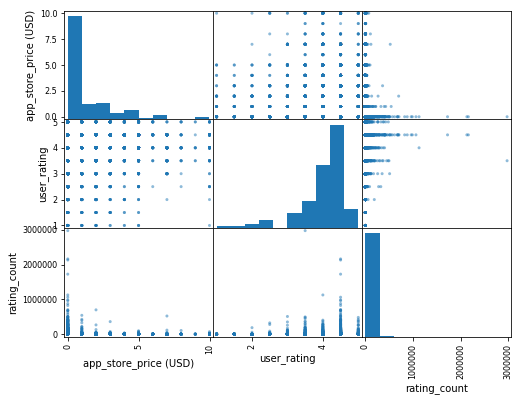

In [11]:
#Plot the data in a scatter matrix
fig = pd.plotting.scatter_matrix(df[['app_store_price (USD)', 'user_rating', 'rating_count']], figsize=(8,6))
#plt.title('Scatter Matrix of App Price & Rating Data') TITLE NOT WORKING, any advice?

plt.show()

#### Interpretation of graph above: 
Shows a general distribution of app store prices, user ratings, and rating counts. Due to the nature of the data (non parametric data, with user rating being an ordinal value), the scatter plots appear linear.

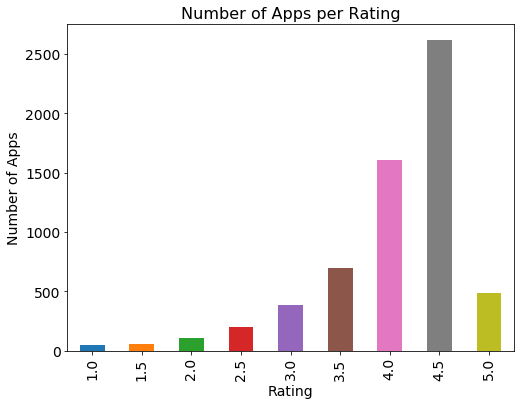

In [12]:
#Number of apps per rating
rating = df['user_rating'].value_counts()
rating_order = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Rating', fontsize = 16)

rating.loc[rating_order].plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#### Interpretation of graph above: 
There are considerably more high ratings than low ratings. A rating of 4.5 is significantly more common than
other options. A 1.0 rating is very rare. The counts also mostly follow a linear distrubtion: the most common rating is a 4.5, and the values decrement in order of rating. The exception is a 5.0 rating, which is the 4th most common rating.

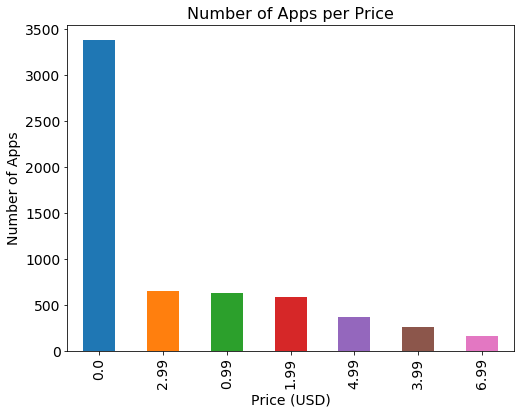

In [13]:
#Number of apps per price
price = df['app_store_price (USD)'].value_counts()

#Specifies number of apps per price to only include unique counts greater than 100 for a particular price.
#This helps better visualize the distribution, as there are many prices that have an insignificant number of apps priced
#at that value (a count of 1 or 2 was common, so those were deleted to better show distribution).
price = (price[price>=100])

plt.xlabel('Price (USD)', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Price', fontsize = 16)

price.plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#### Interpretation of graph above: 

There are considerably more apps that are free than at any other price point. Following the free apps, the \\$2.99, \\$0.99, and \\$1.99 respectively are the most popular. However, they are considerably less common than the free apps. In our data set, there are 3,383 apps that are mostly free. The next most common price, \\$2.99, has only 650 apps.

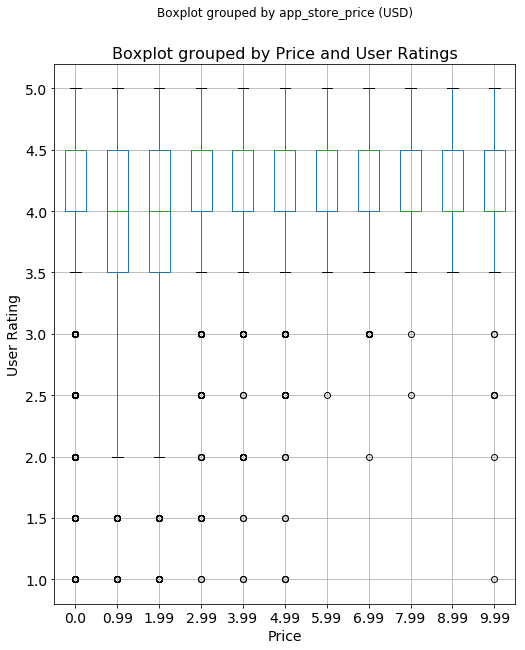

In [14]:
#Boxplot that groups app store price by user ratings to understand the trend of app store ratings for each price
df.boxplot(column=['user_rating'], by=['app_store_price (USD)'], fontsize = 14, figsize=(8,10))

plt.xlabel('Price', fontsize = 14)
plt.ylabel('User Rating', fontsize = 14)
plt.title('Boxplot grouped by Price and User Ratings', fontsize = 16)
plt.show()

#### Interpretation of graph above: 
The boxplot shows the average user rating by prices up to \\$10. Prices up to \\$10 were chosen as to better see the boxes. Due to the nature of our data (non-parametric ordinal data), the boxes align exactly at rating data points. This results in the grid-like boxplot shown below. The range of user ratings for each price all lie within the 4.0-4.5 range, with the 1st and 3rd quartiles all being within this range. The exception is with apps that are \\$0.99 and \\$1.99, which have a Q1 of 3.5.

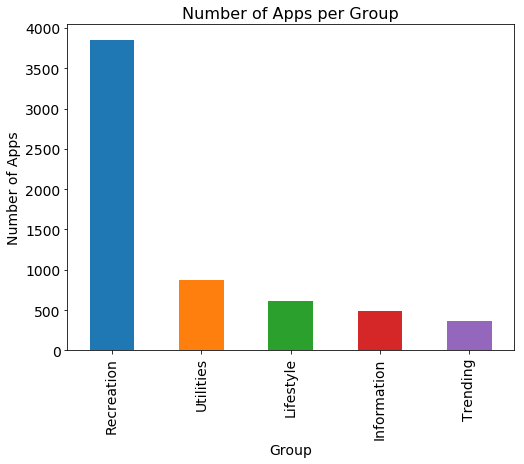

In [15]:
#Number of Apps per Group
group = df['group'].value_counts()

plt.xlabel('Group', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Group', fontsize = 16)

group.plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

In [16]:
#Creating a separate dataframe for each group

#Recreation Group
df_rec = df
df_rec = df_rec[df.group == 'Recreation']
df_rec = df_rec.drop(columns =['app_name','category','group'], axis=1)

#Utilities Group
df_utilities = df
df_utilities = df_utilities[df.group == 'Utilities']
df_utilities = df_utilities.drop(columns =['category','group'], axis=1)

#Lifestyle Group
df_life = df
df_life = df_life[df.group == 'Lifestyle']
df_life = df_life.drop(columns =['category','group'], axis=1)


#Information Group
df_info = df
df_info = df_info[df.group == 'Information']
df_info = df_info.drop(columns =['category','group'], axis=1)


#Trending Group
df_trending = df
df_trending = df_trending[df.group == 'Trending']
df_trending = df_trending.drop(columns =['category','group'], axis=1)


In [17]:
#Finding the average prices and ratings per group
df_rec = df_rec.mean()
df_rec

app_store_price (USD)        1.362993
rating_count             14765.904984
user_rating                  4.124351
dtype: float64

In [18]:
df_utilities = df_utilities.mean()
df_utilities

app_store_price (USD)        1.911657
rating_count             14242.365938
user_rating                  3.996548
dtype: float64

In [19]:
df_life = df_life.mean()
df_life

app_store_price (USD)        1.169579
rating_count             14048.556634
user_rating                  3.901294
dtype: float64

In [20]:
df_info = df_info.mean()
df_info

app_store_price (USD)       2.242224
rating_count             6148.834694
user_rating                 4.004082
dtype: float64

In [21]:
df_trending = df_trending.mean()
df_trending

app_store_price (USD)        0.772139
rating_count             32695.436111
user_rating                  3.656944
dtype: float64

In [22]:
#Dataframe for all the groups
df_group = df.groupby('group').mean()

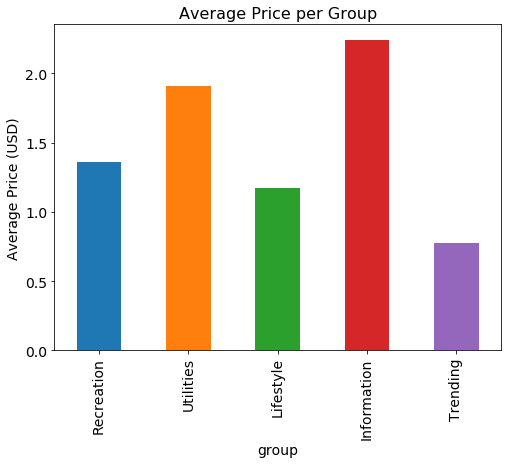

In [23]:
#Average price per group
group_price = df_group['app_store_price (USD)']
group_order = ['Recreation', 'Utilities', 'Lifestyle', 'Information', 'Trending']

plt.xlabel('Group', fontsize = 14)
plt.ylabel('Average Price (USD)', fontsize = 14)
plt.title('Average Price per Group', fontsize = 16)

group_price.loc[group_order].plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

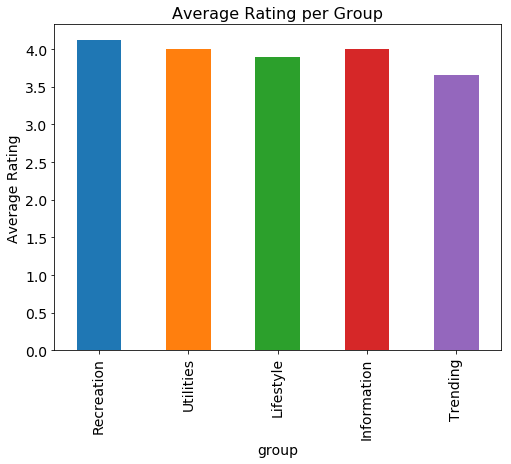

In [24]:
#Average rating per group
group_rating = df_group['user_rating']

plt.xlabel('Group', fontsize = 14)
plt.ylabel('Average Rating', fontsize = 14)
plt.title('Average Rating per Group', fontsize = 16)

group_rating.loc[group_order].plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#### Interpretation:
\\$5

## Statistical Tests

In [25]:
# See relationship between app price and user rating
df[['app_store_price (USD)', 'user_rating']].groupby(['user_rating']).describe()

app_store_price (USD)                                            \
                            count      mean       std  min  25%   50%   75%   
user_rating                                                                   
1.0                          43.0  1.390233  2.045286  0.0  0.0  0.99  1.99   
1.5                          56.0  1.208929  1.419337  0.0  0.0  0.99  1.99   
2.0                         106.0  1.155755  1.737413  0.0  0.0  0.00  1.99   
2.5                         196.0  1.103214  1.948201  0.0  0.0  0.00  1.99   
3.0                         382.0  1.252199  1.936959  0.0  0.0  0.00  1.99   
3.5                         695.0  1.522000  2.175266  0.0  0.0  0.00  2.99   
4.0                        1603.0  1.591684  2.271349  0.0  0.0  0.00  2.99   
4.5                        2620.0  1.425744  2.089482  0.0  0.0  0.00  2.99   
5.0                         488.0  1.478832  2.144816  0.0  0.0  0.00  1.99   

                   
              max  
user_rating        
1.0          9.99  
1.5          4.99  
2.0          9.99  
2.5          9.99  
3.0          9.99  
3.5          9.99  
4.0          9.99  
4.5          9.99  
5.0          9.99

In [26]:
# only view these two variables
df[['app_store_price (USD)', 'user_rating']].corr()

,app_store_price (USD),user_rating
app_store_price (USD),1.000000,0.024655
user_rating,0.024655,1.000000


After an initial examination of the two variables, there seems to be a very weak correlation between the two (0.0246). We now want to single out the means of the prices per user rating. These values better represent how much an app would cost for a particular user rating. 

In [27]:
df2 = df.groupby('user_rating').mean()
df2

,app_store_price (USD),rating_count
user_rating,,
1.0,1.390233,30.232558
1.5,1.208929,203.500000
2.0,1.155755,2907.235849
2.5,1.103214,5419.933673
3.0,1.252199,7502.861257
3.5,1.522000,15656.435971
4.0,1.591684,7943.392389
4.5,1.425744,22369.696947
5.0,1.478832,12802.922131


Based on the data in df2, we can create a model to predict future data points. 

In [28]:
#1 degree linear model
a1,b1 = np.polyfit(df2['app_store_price (USD)'], df2.index, 1)
a1, b1

(4.7822995472830661, -3.4447276537063565)

a1 (4.7823) represents the slope (m) in a standard line equation of y = m * x + b. b1 (-3.4447) represents the y-intercept (b) of the same equation. We can use these points to graph a line that 

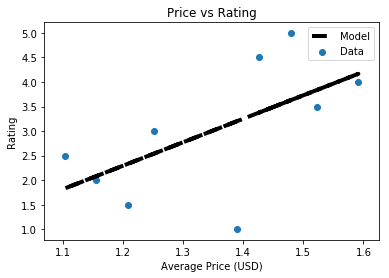

In [29]:
plt.scatter(df2['app_store_price (USD)'], df2.index, label='Data')

xs = df2['app_store_price (USD)']
ys = 4.7823 * xs - 3.4447
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Average Price (USD)')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.legend()
plt.show()

The dataset for this project contains nonparametric statistics, so normal statistical tests cannot be used. The Ratings variable is an ordinal number, meaning that there is a meaning to the way the numbers are ranked. A 1.0 rating, for example, is much worse than 5.0 rating. Because of this nonparametric quality, we will use the Mann-Whitney U test to analyze the data. Unlike most statistical tests, this one does not require that the data have a normal distribution. The Mann-Whitney U test compares the distribution of two groups and determines whether they are equal or not.

In [30]:
# Set up a helper function for checking p-values against an alpha level, and printing result
alpha = 0.05

def check_test(p_val, alpha):
    if p_val > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [31]:
# Using Mann-Whitney U test to check difference between distributions
MW_stat, MW_p_val = stats.mannwhitneyu(df2.index, df2['app_store_price (USD)'])
MW_stat, MW_p_val

(11.0, 0.0052221355506851131)

In [32]:
# Check p-value of Mann-Whitney U test
check_test(MW_p_val, alpha)

Different distribution (reject H0)


Using the Mann-Whitney U test, we find that the p-value of the test is 0.00522. We then compare the p-value with the standard alpha of 0.05 and see that the p-value is smaller than the alpha, and we can reject the null hypothesis. This means that there is statistical evidence to show that there is a difference between the distributions.

Another test that can be used for nonparametric statistics is the Kolgomorov-Smirnov test. This test compares the cumulative distributions between two groups. This test also has the same null and alternate hypotheses as the Mann-Whitney U test.

In [33]:
# Using a two-sample Kolmogorov-Smirnov test to check difference in distribution
KS_stat, KS_p_val = stats.ks_2samp(df2.index, df2['app_store_price (USD)'])
KS_stat, KS_p_val

(0.77777777777777779, 0.0034507242661324117)

In [34]:
# Check p-value of Kolmogorov-Smirnov test
check_test(KS_p_val, alpha)

Different distribution (reject H0)


The Kolmogorov-Smirnov test gives us a p-value of 0.00345. This value is also smaller than the alpha of 0.05 therefore we can still reject the null hypothesis. There is only a ~0.35% chance that the data observed is based off of chance.

In [35]:
#1 degree linear model for Recreation Group
a1,b1 = np.polyfit(df_group['app_store_price (USD)'], df_group['user_rating'], 1)
a1, b1

(0.19180539209708791, 3.650524192860213)

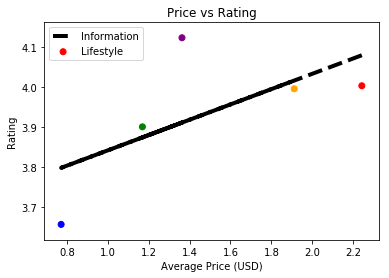

In [36]:
color = ['Red', 'Green', 'Purple', 'Blue', 'Orange']
name = ['Information', 'Lifestyle', 'Trending', 'Recreation', 'Utilities']
plt.scatter(df_group['app_store_price (USD)'], df_group['user_rating'], label='data', c=color)

xs = df_group['app_store_price (USD)']
ys = 0.1918 * xs + 3.6505
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Average Price (USD)')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.legend(('Information', 'Lifestyle', 'Trending'))
plt.show()

In [37]:
# Using Mann-Whitney U test to check difference between distributions of groups
MW_group_stat, MW_group_p_val = stats.mannwhitneyu(df_group['app_store_price (USD)'], df_group['user_rating'])
MW_group_stat, MW_group_p_val

(0.0, 0.0060928901776724064)

In [38]:
# Check p-value of Mann-Whitney U test
check_test(MW_group_p_val, alpha)

Different distribution (reject H0)


In [39]:
# Using a two-sample Kolmogorov-Smirnov test to check difference in distribution
KS_group_stat, KS_group_p_val = stats.ks_2samp(df_group['user_rating'], df_group['app_store_price (USD)'])
KS_group_stat, KS_group_p_val

(1.0, 0.0037813540593701006)

In [40]:
# Check p-value of Kolmogorov-Smirnov test
check_test(KS_group_p_val, alpha)

Different distribution (reject H0)


# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*